In [1]:
from preamble import *
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
#필요한 라이브러리들을 임포트한다.

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
#한글 출력시 오류가 날 때 추가하는 코드

from sklearn.neighbors import KNeighborsRegressor
# KNeighborRegressor를 임포트한다.

from sklearn.model_selection import train_test_split
# train_test_split를 임포트한다.

from sklearn.datasets import load_boston

from sklearn.linear_model import LogisticRegression
#LogisticRegression을 임포트한다.

from sklearn import datasets
#datasets를 임포트한다.

iris = datasets.load_iris()
print(list(iris.keys()))
print("타깃의 이름: {}".format(iris['target_names']))
print("특성의 이름: {}".format(iris['feature_names']))
#이전에 했던 것 처럼 iris를 불러오고 타깃이름과 특성이름을 출력한다.

X = iris["data"][:,3:]
# petal width만 가지고 온다.

print(X.shape)

y = (iris["target"]==2).astype(np.int)
#virginica면 1로 만들어지고 아니면 0으로 만들어진다.

print(y.shape)

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']
타깃의 이름: ['setosa' 'versicolor' 'virginica']
특성의 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 1)
(150,)


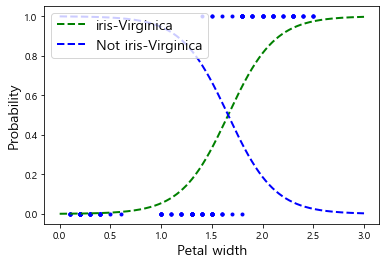

array([1, 0, 0, 1])

In [15]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

#꽃잎의 너비가 0-3cm인 꽃에 대해 모델의 추정확률

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X,y,"b.")
plt.plot(X_new,y_proba[:,1],"g--",label="iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not iris-Virginica")
plt.xlabel("Petal width", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

log_reg.predict([[1.7],[1.5],[1.3],[2.0]])
#밑의 두 곡선이 겹치는 부분이 결정경계다.
#위의 []안의 값이 그 결정경계보다 크면 1을
#작으면 0이 밑의 Out[15]에 출력된다.

C:\Users\HomePC\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


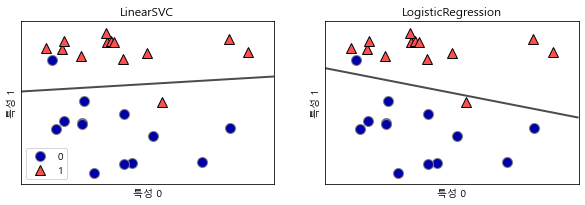

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

#밑의 결과를 보면 분류가 잘못되었다는 것을 볼 수 있다.

In [28]:
#샘플수 : 569, 피쳐 30

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}\n".format(logreg.score(X_test, y_test)))

logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}\n".format(logreg100.score(X_test, y_test)))
#1/100 : 패널티가 작아진다. 규제완화, 훈련세트에 맞추려함
# 개개의 포인터에 맞추려함

logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))
# 규제강화, 패널티가 커진다. 계수를 0에 가깝게, 다수의 포인터에 맞추려함

훈련 세트 점수: 0.958
테스트 세트 점수: 0.958

훈련 세트 점수: 0.979
테스트 세트 점수: 0.965

훈련 세트 점수: 0.953
테스트 세트 점수: 0.951


C=0.001인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000인 l1 로지스틱 회귀의 테스트 정확도: 0.98


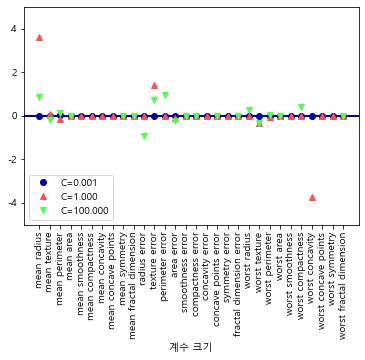

In [33]:
for C, marker in zip([0.001, 1, 100], ['o','^','v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    print("C={:.3f}인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
    C, lr_l1.score(X_train, y_train)))
    print("C={:.3f}인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
    C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
             
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.xlabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

#C가 작으면
#복잡도 감소
#성능 약화
#규제 강화
#계수를 0에 가깝게
#다수의 포인터에 맞추려함

# C가 크면
# 복잡도 증가
# 성능 향상
# 규제 완화
# 훈련세트에 맞추려함
# 개개의 포인터에 맞추려함